### **EDA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install plotly_express

In [ ]:
details_df = pd.read_csv('/content/drive/MyDrive/Dataset/archive/all_season_details.csv', index_col=None)
batting_df = pd.read_csv('/content/drive/MyDrive/Dataset/archive/all_season_batting_card.csv', index_col=None)
summary_df = pd.read_csv('/content/drive/MyDrive/Dataset/archive/all_season_summary.csv', index_col=None)
bowling_df = pd.read_csv('/content/drive/MyDrive/Dataset/archive/all_season_bowling_card.csv', index_col=None)

In [ ]:
!pip install chart-studio

In [10]:
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
import pandas as pd
import numpy as np
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df_season_details_2023 = pd.read_csv("/content/drive/MyDrive/Dataset/archive/all_season_details.csv",low_memory=False)
df_season_summary_2023 = pd.read_csv("/content/drive/MyDrive/Dataset/archive/all_season_summary.csv",low_memory=False)
points_df = pd.read_csv('/content/drive/MyDrive/Dataset/archive/points_table.csv', index_col=None)

In [17]:
df_season_summary_2023.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire'],
      dtype='object')

In [18]:
df_season_summary_2023.iloc[:10,[3,5,6,7,8,9,10,13]]

short_name home_team away_team toss_won    decision 1st_inning_score  \
0    GT v CSK        GT       CSK       GT  BOWL FIRST            178/7   
1  PBKS v KKR      PBKS       KKR      KKR  BOWL FIRST            191/5   
2    LSG v DC       LSG        DC       DC  BOWL FIRST            193/6   
3    SRH v RR       SRH        RR      SRH  BOWL FIRST            203/5   
4    RCB v MI       RCB        MI      RCB  BOWL FIRST            171/7   
5   CSK v LSG       CSK       LSG      LSG  BOWL FIRST            217/7   
6     DC v GT        DC        GT       GT  BOWL FIRST            162/8   
7   RR v PBKS        RR      PBKS       RR  BOWL FIRST            197/4   
8   KKR v RCB       KKR       RCB      RCB  BOWL FIRST            204/7   
9   LSG v SRH       LSG       SRH      SRH   BAT FIRST            121/8   

  2nd_inning_score winner  
0            182/5     GT  
1            146/7   PBKS  
2            143/9    LSG  
3            131/8     RR  
4            172/2    RCB  
5            205/7    CSK  
6            163/4     GT  
7            192/7   PBKS  
8              123    KKR  
9            127/5    LSG

**Number of matches won by all teams from 2008 to 2023**

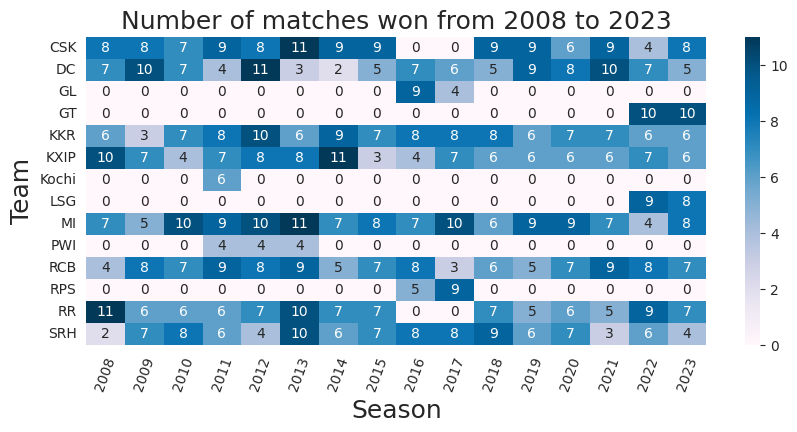

In [75]:
# Create a pivot table to summarize the number of matches won by each team for each season
matcheswon_pivot = points_df.pivot_table(index='short_name',
                                         columns='season',
                                         values='matcheswon',
                                         fill_value=0)

f = plt.figure(figsize=(10, 4))
gs = f.add_gridspec(1, 1)
with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 0])
    g1 = sns.heatmap(matcheswon_pivot, annot=True, fmt="g", cmap='PuBu')
    g1.set_facecolor("#fdb913")

    g1.axes.set_title("Number of matches won from 2008 to 2023", fontsize=18)
    g1.set_xlabel("Season", fontsize=18)
    g1.set_ylabel("Team", fontsize=18)

    g1.set_xticklabels(g1.get_xticklabels(), rotation=70)
    g1.set_yticklabels(g1.get_yticklabels(), rotation=0)

**Analyzing the impact of toss decisions on match outcomes**

In [80]:
# Filter data based on toss decision
df_bowl_first = df_season_summary_2023[df_season_summary_2023.decision == "BOWL FIRST"]
df_bat_first = df_season_summary_2023[df_season_summary_2023.decision == "BAT FIRST"]

# Calculate number of matches and outcomes for teams choosing to bowl first
num_matches_bowl_first = len(df_bowl_first)
teams_winning_chasing = df_bowl_first[df_bowl_first.toss_won == df_bowl_first.winner]
teams_losing_chasing = df_bowl_first[df_bowl_first.toss_won != df_bowl_first.winner]

# Calculate number of matches and outcomes for teams choosing to bat first
num_matches_bat_first = len(df_bat_first)
teams_winning_batting = df_bat_first[df_bat_first.toss_won == df_bat_first.winner]
teams_losing_batting = df_bat_first[df_bat_first.toss_won != df_bat_first.winner]

# Print the outcomes on separate lines
print(f"Matches where decision was to bowl first: {num_matches_bowl_first}")
print(f"Winning matches after choosing to bowl first: {len(teams_winning_chasing)}")
print(f"Losing matches after choosing to bowl first: {len(teams_losing_chasing)}")
print()
print(f"Matches where decision was to bat first: {num_matches_bat_first}")
print(f"Winning matches after choosing to bat first: {len(teams_winning_batting)}")
print(f"Losing matches after choosing to bat first: {len(teams_losing_batting)}")

Matches where decision was to bowl first: 650
Winning matches after choosing to bowl first: 355
Losing matches after choosing to bowl first: 295

Matches where decision was to bat first: 372
Winning matches after choosing to bat first: 167
Losing matches after choosing to bat first: 205


In [86]:
# Extracting values for the charts
toss_decision_labels = list(df_season_summary_2023.decision.value_counts().index)
toss_decision_values = df_season_summary_2023.decision.value_counts()

teams_chasing_labels = ["Games won chasing", "Games lost chasing"]
teams_winning_chasing_values = [np.shape(teams_winning_chasing)[0], np.shape(teams_losing_chasing)[0]]

teams_batting_labels = ['Games won batting first', 'Games lost batting first']
teams_winning_batting_values = [np.shape(teams_winning_batting)[0], np.shape(teams_losing_batting)[0]]

toss_chart_colors = ["green", "gold"]
fielding_first_chart_colors = ["lightskyblue", "yellow"]
batting_first_chart_colors = ["lightskyblue", "yellow"]

# Creating subplots
toss_decision_outcome = make_subplots(rows=1, cols=3,
                                      specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                                      subplot_titles=['<b>Toss decision</b>', '<b>Win%: Bowl first</b>', '<b>Win%: Bat first</b>'])

# Adding traces (pie charts) to subplots
toss_decision_outcome.add_trace(go.Pie(labels=toss_decision_labels, values=toss_decision_values, pull=[0.2, 0],
                                       marker=dict(colors=toss_chart_colors)), row=1, col=1)

toss_decision_outcome.add_trace(go.Pie(labels=teams_chasing_labels, values=teams_winning_chasing_values, pull=[0.2, 0],
                                       marker=dict(colors=fielding_first_chart_colors)), row=1, col=2)

toss_decision_outcome.add_trace(go.Pie(labels=teams_batting_labels, values=teams_winning_batting_values, pull=[0.2, 0],
                                       marker=dict(colors=batting_first_chart_colors)), row=1, col=3)

# Updating trace properties
toss_decision_outcome.update_traces(hoverinfo='label+value', textfont_size=20, marker=dict(line=dict(color='#000000', width=2)))

# Show the plot
toss_decision_outcome.show()


 **Batting and Bowling Statistics**

In [28]:
df_bow_23= pd.read_csv("/content/drive/MyDrive/Dataset/archive/2023/bowling_card.csv")
df_bat_23= pd.read_csv("/content/drive/MyDrive/Dataset/archive/2023/batting_card.csv")

**Top 10 Batsman by Run**

In [88]:
import plotly_express as px

# Mapping of stadium names to cities
city_map = {
    'Arun Jaitley Stadium, Delhi': 'Delhi',
    'Eden Gardens, Kolkata': 'Kolkata',
    'M. Chinnaswamy Stadium, Bengaluru': 'Bengaluru',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'Chennai',
    'Narendra Modi Stadium, Ahmedabad': 'Ahmedabad',
    'Wankhede Stadium, Mumbai': 'Mumbai'
}

# Mapping of stadium names to home teams
home_team_map = {
    'Arun Jaitley Stadium, Delhi': 'DC',
    'Eden Gardens, Kolkata': 'KKR',
    'M. Chinnaswamy Stadium, Bengaluru': 'RCB',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'CSK',
    'Wankhede Stadium, Mumbai': 'MI'
}

# Color mapping for different teams
team_colors = {
    'MI': '#0722ab',
    'CSK': '#fdb913',
    'DC': '#2561AE',
    'SRH': '#fb653f',
    'KKR': '#391F5C',
    'KIXP': '#b32524',
    'PBKS': '#dd1212',
    'RR': '#FF4081',
    'RCB': '#121010',
    'GT': '#004587',
    'LSG': '#02ccbf'
}

# Color mapping for different venues
venue_colors = {
    'Mumbai': '#0722ab',
    'Chennai': '#fdb913',
    'Delhi': '#004c93',
    'Kolkata': '#3d2256',
    'Ahmedabad': '#545252',
    'Bengaluru': '#ef4022'
}

pd.set_option('display.max_columns', None)

def plot_batting_chart(title, column, label):
    # Grouping data and getting top 10 batsmen based on runs
    runs = df_bat_23.groupby(['fullName', 'current_innings'])[column].sum().sort_values(ascending=False).reset_index().head(10)

    fig = px.bar(runs, x='fullName', y=column,
                 hover_data=['fullName', column], color='current_innings',
                 labels={column: label},
                 color_discrete_map=team_colors,
                 text=column)

    fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': runs['fullName'], 'title': 'Batsman', 'showgrid': False},
                      yaxis={'showgrid': False},
                      title=title)

    fig.show()

plot_batting_chart(title='Top 10 Batsmen by Runs', column='runs', label='Runs')


**Best Strike rate**

In [90]:
def plot_batting_avg_chart(title, column, label):
    # Calculate the mean batting average for each player
    batting_avg = df_bat_23.groupby(['fullName', 'current_innings'])[column].mean().sort_values(ascending=False).reset_index().round(2).head(10)

    fig = px.bar(batting_avg, x='fullName', y=column,
                 hover_data=['fullName', column], color='current_innings',
                 labels={column: label},
                 color_discrete_map=team_colors,
                 text=column)

    fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': batting_avg['fullName'], 'title': 'Batsman', 'showgrid': False},
                      yaxis={'showgrid': False},
                      title=title)

    fig.show()

# Replace '-' with '0' and convert 'strikeRate' column to float
df_bat_23['strikeRate'] = df_bat_23['strikeRate'].replace('-', '0')
df_bat_23['strikeRate'] = df_bat_23['strikeRate'].astype(float)

# Plot the batting average chart
plot_batting_avg_chart('Best strike rate', 'strikeRate', 'Best strike rate')


**Most Wickets taken by each bowler**

In [93]:
def plot_bowling_chart(title, column, label):
    # Calculate the total number of wickets taken by each bowler
    total_wickets = df_bow_23.groupby(['fullName', 'bowling_team'])[column].sum().sort_values(ascending=False).reset_index().head(10)

    fig = px.bar(total_wickets, x='fullName', y=column,
                 hover_data=['fullName', column], color='bowling_team',
                 labels={column: label},
                 color_discrete_map=team_colors,
                 text=column)

    fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': total_wickets['fullName'], 'title': 'Bowler', 'showgrid': False},
                      yaxis={'showgrid': False},
                      title=title)

    fig.show()

plot_bowling_chart('Most wickets','wickets','Most wickets')

**Number of matches played at different veneus**

<ipython-input-96-33844c05269c>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




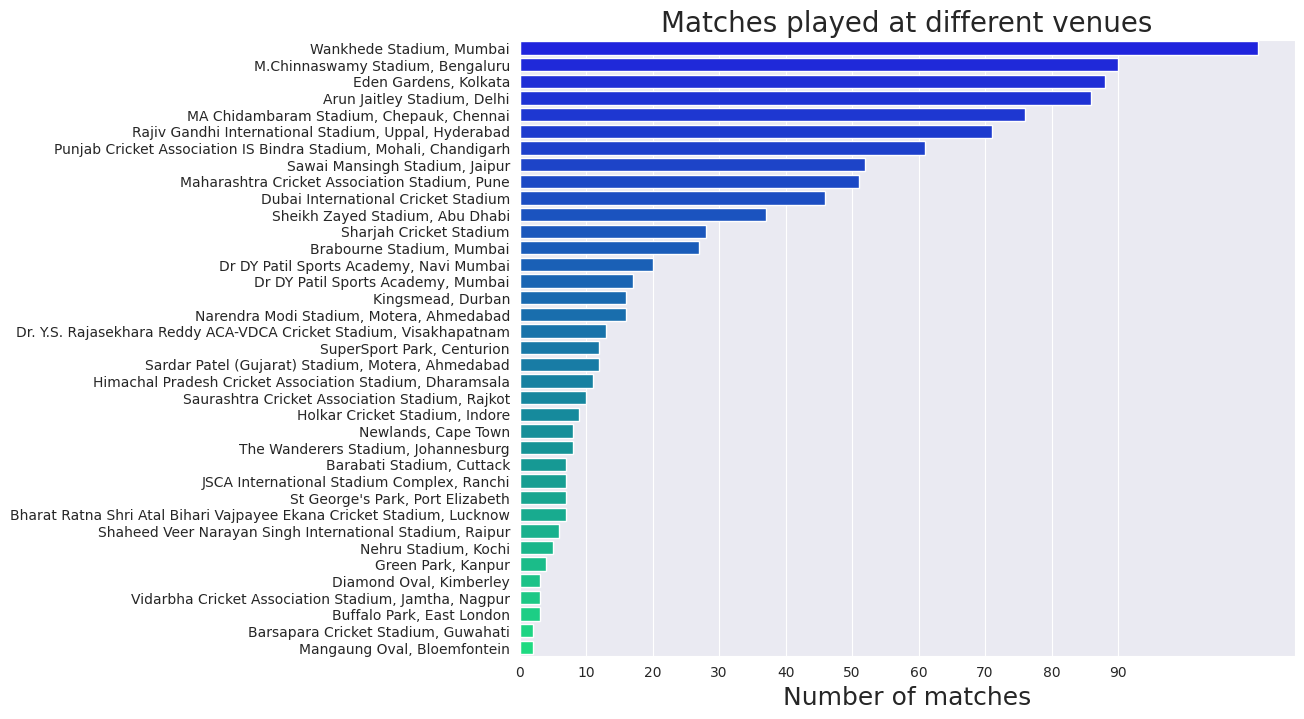

In [96]:
f = plt.figure(figsize=(10, 8))
gs = f.add_gridspec(1, 1)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    g1 = sns.countplot(y="venue_name", data=summary_df, palette="winter", order=summary_df['venue_name'].value_counts().index)

    g1.axes.set_title("Matches played at different venues", fontsize=20)
    g1.set_xlabel("Number of matches", fontsize=18)
    g1.set_ylabel(None, fontsize=20)

    ax.set_xticks(range(0, 100, 10))

plt.show()


**Effect of toss on outcome**

<ipython-input-97-35d4712d5f44>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-97-35d4712d5f44>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




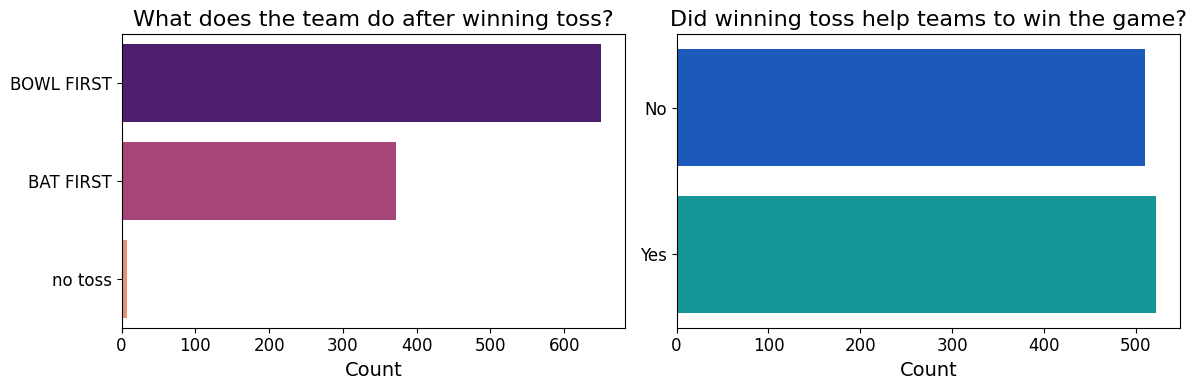

In [97]:
def TossWinVsGameWin(summary_df):
    # Select relevant columns
    toss = summary_df[['season', 'toss_won', 'decision', 'winner']]
    # Create a new column to indicate whether the toss influenced the outcome
    toss['toss_influenced_outcome'] = toss['toss_won'] == toss['winner']
    return toss

toss = TossWinVsGameWin(summary_df)

plt.figure(figsize=(12, 4))

# Subplot 1: Toss decisions
plt.subplot(1, 2, 1)
sns.countplot(y="decision", data=toss, palette='magma')
plt.title("What does the team do after winning toss?", fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel(None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Subplot 2: Impact of winning the toss on match outcome
plt.subplot(1, 2, 2)
sns.countplot(y="toss_influenced_outcome", data=toss, palette='winter')
plt.title("Did winning toss help teams to win the game?", fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel(None)
plt.yticks([0, 1], ['No', 'Yes'], fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.show()


**Effect of Captaincy**

<ipython-input-118-4596902d936b>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




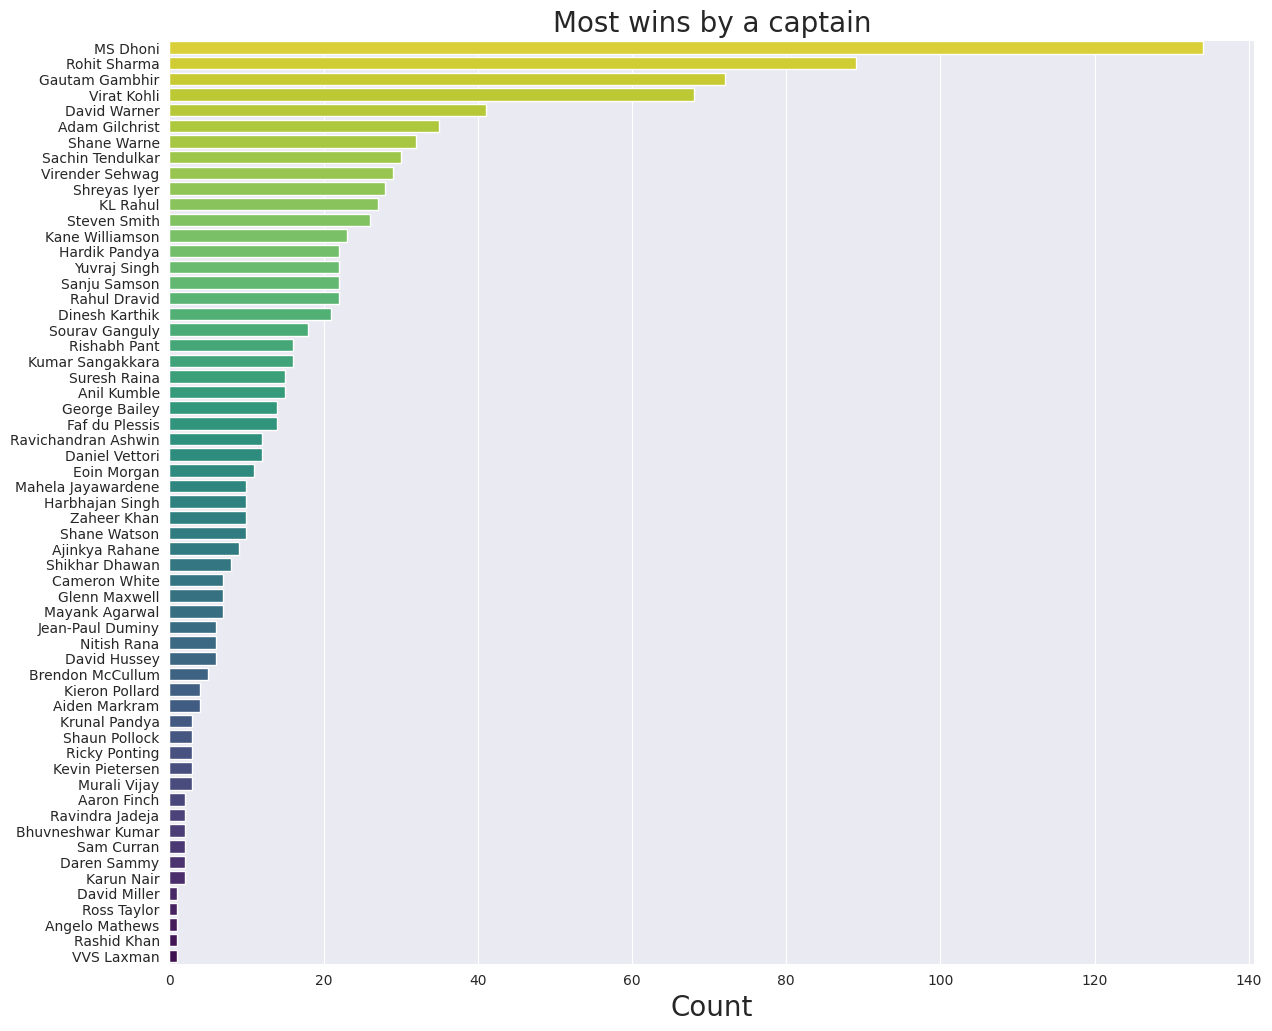

In [118]:
def Captaincy():
    captaincy_data = []

    # Iterate through each match in the DataFrame
    for index, match in summary_df.iterrows():
        row = {}
        # Check if the home team won the match
        if summary_df.at[index, 'home_team'] == summary_df.at[index, 'winner']:
            row['winning_captain'] = summary_df.at[index, 'home_captain']
            row['winning_team'] = summary_df.at[index, 'home_team']
        # Check if the away team won the match
        elif summary_df.at[index, 'away_team'] == summary_df.at[index, 'winner']:
            row['winning_captain'] = summary_df.at[index, 'away_captain']
            row['winning_team'] = summary_df.at[index, 'away_team']
        captaincy_data.append(row)
    return captaincy_data

captaincy_data = Captaincy()

cap_df = pd.DataFrame(captaincy_data)

f = plt.figure(figsize=(14, 12))
gs = f.add_gridspec(1, 1)

with sns.axes_style("darkgrid"):

    ax = f.add_subplot(gs[0, 0])

    g1 = sns.countplot(y="winning_captain", data=cap_df, palette='viridis_r', order=cap_df['winning_captain'].value_counts().index)

    g1.axes.set_title("Most wins by a captain", fontsize=20)
    g1.set_ylabel(None, fontsize=18)
    g1.set_xlabel('Count', fontsize=20)

plt.show()
